In [2]:
%matplotlib inline
#ftp://ftp.ncdc.noaa.gov/pub/data/cdo/documentation/PRECIP_15_documentation.pdf

'''
QPCP: The amount of precipitation recorded at the station for the 15 minute period
ending at the time specified for DATE above given in hundredths of inches or tenths of
millimeters depending on user’s specification of standard or metric units.

HT==hundredths of inches
'''

#What does the daily precipitation accumulation look like?

import pandas as pd
import numpy as np
df=pd.read_csv("datasets/1934033.csv")
df=df[df["STATION"]=="COOP:200230"] #A2 campus
df.head()
df.describe()

,ELEVATION,LATITUDE,LONGITUDE,QGAG,QPCP
count,12192.000000,12192.000000,12192.000000,12192.000000,12192.000000
mean,274.402657,42.297762,-83.714192,-4977.626605,-506.243985
std,0.225965,0.002615,0.002895,5005.592632,2244.553990
min,274.300000,42.294700,-83.716670,-9999.000000,-9999.000000
25%,274.300000,42.294700,-83.716670,-9999.000000,0.100000
50%,274.300000,42.300000,-83.716670,0.000000,0.100000
75%,274.300000,42.300000,-83.710800,0.870000,0.100000
max,274.900000,42.300000,-83.710800,999.990000,999.990000


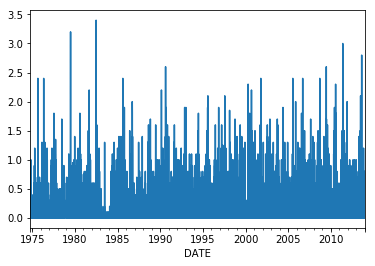

In [17]:
df=df.set_index(pd.to_datetime(df["DATE"]))
def clean(item):
    if item == -9999:
        return np.nan
    if item == 999.99:
        return np.nan
    return item

df["QPCP"]=df["QPCP"].apply(clean)

new_df=df["QPCP"].interpolate().resample("1D").apply(np.sum)
new_df.plot()

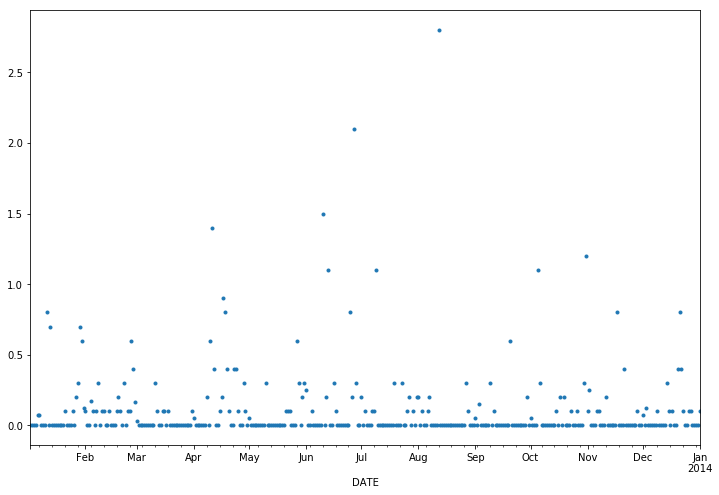

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
new_df[new_df.index>"2013"].plot(style=".")